# Facemask detection


1. Download face mask lite dataset from kaggle
2. Unzip into folder named "data"

In [11]:
# module import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
import torchvision

In [4]:
# Loading data preps
train_data_dir = "data/mix_train"
test_data_dir = "data/mix_test"

batch_size_train = 64
batch_size = 64


In [5]:
# Using GPU for faster training
device = "cuda" if torch.cuda.is_available() else "cpu"
kwargs = {'num_workers': 1, 'pin_memory': True} if device=='cuda' else {}

In [6]:
# Data transform
train_transform = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
    ])

test_transform = transforms.Compose([transforms.ToTensor()])

In [7]:
# Applying transforms
train_data = datasets.ImageFolder(train_data_dir, transform=train_transform)
test_data = datasets.ImageFolder(test_data_dir, transform=test_transform)


In [13]:
# Data Loading

train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size_train, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size, **kwargs)



In [16]:
# Function to show images
def imshow(img):
     img = img / 2 + 0.5
     npimg = img.numpy()
     plt.imshow(np.transpose(npimg, (1, 2, 0)))
     plt.show()


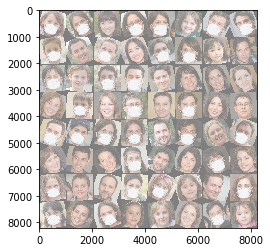

mask


In [17]:
images, labels = next(iter(train_loader))

imshow(torchvision.utils.make_grid(images))
